<a href="https://colab.research.google.com/github/OANInternational/handicape/blob/master/analyse_per_handic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Le projet ici c'est une etude de situation des personnes handicapées de la comunne de Nikki. L'analyse qui se feront vont aider a construir les projects commaunautaire pour aider ce collectif.

# DOSSIER DE TRAVAIL

Le projet utilise drive comme dossier de travail

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd
%cd ..
%cd content


/root
/
/content


In [0]:
%cd drive/'Shared drives'/'C. Políticas Sociales'/'PROYECTOS'/'Handicapées'/'Recensement'

/content/drive/Shared drives/C. Políticas Sociales/PROYECTOS/Handicapées/Recensement


# IMPORTS

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml
import seaborn as sns

from scipy import stats
from matplotlib import colors as mcolors


spreadsheet_ids = yaml.load( open("sheets_parameters.yaml", "r" ))
#base de donées avec le recensement des personnes handicapées
ID=str(spreadsheet_ids['ID'])

# GLOBAL VARIABLES

In [0]:
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# GSHEET & GDRIVE AUTHETICATION

In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
from googleapiclient.discovery import build
sheet_service = build('sheets', 'v4')

# DATABASE

In [0]:
SPREADSHEET_ID = ID
RANGE_NAME = 'handicapees'

gsheet = sheet_service.spreadsheets().values().get(spreadsheetId=SPREADSHEET_ID, range=RANGE_NAME).execute()

df_per_han = pd.DataFrame(gsheet.get('values', [])[1:],columns= gsheet.get('values', [])[0:1][0])

In [0]:
df_per_han.head()

,Timestamp,Email address,Nombre du form,Arrondisement,Village,Nom,Prénoms,Age,Sex,Type de Handicappées,Besoin Sociale,Besoin Technique,Profession,Maison,Contacts,Personnes à Contacter,AN,Nom et Prenom du mère,Activites du mère,Addreses du mère,Nom et Prenom du père,Activites du père,Addreses du père,Marié,Nom et Prenom du partenaire,Activites du partenaire,Addreses du partenaire,Nombre de garçon(s),Nombre de fille(s),Nom des enfants,Prenom (et nom) du enfant 1,Activites du enfant 1,Addreses du enfant 1,Prenom (et nom) du enfant 2,Activites du enfant 2,Addreses du enfant 2,Prenom (et nom) du enfant 3,Activites du enfant 3,Addreses du enfant 3,OBSERVATIONS,Choisir le village dans Biro,Choisir le village dans Gnonkourokali,Choisir le village dans Nikki,Choisir le village dans Ouenou,Choisir le village dans Serekali,Choisir le village dans Suya,Choisir le village dans Tasso
0,08/08/2019 18:54:51,d.alfaro@oaninternational.org,1,Biro,Tèbo Gando,SALIFOU,Animou,2,M,Mongole,,,,,,,OUI,YAKOUBOU Awaou,Ménagere,,GARBA Salifou,Cultivateur,94875131,NON,,,,,,,,,,,,,,,,Doit être conduit au centre Talitakou,Tèbo Gando,None,None,None,None,None,None
1,08/08/2019 19:04:21,a.sueiro@oaninternational.org,2,Nikki,Gourou,Tabe,Amina,56,F,Moteur,"Tricycle, Cannes",AGR,,,,,OUI,,,,,,,OUI,Tidjani Mohammed,Cultivateur,97130381,3,0,Tidjani,Moussa,Diplomé sans emploi,9500007,Louliman,Diplomé CETA,95889921,Mounarah,Diplomé Elève TleD,95689009,Vendeuse salade,,,Gourou,None,None,None,None
2,08/08/2019 19:14:46,a.sueiro@oaninternational.org,3,Nikki,Gourou,MACHOUDOU,Gounou Alassane,18,M,"Moteur, Sourd, Muet",Fauteuil roulant,,,,,,OUI,Amaomar Feuliratrou,Tisseuse,94174537,Gounon Macheucheu,Cultivateur,,NON,,,,,,,,,,,,,,,,,,,Gourou,None,None,None,None
3,08/08/2019 19:25:02,a.sueiro@oaninternational.org,4,Nikki,Gah Maro,MOUTALABI,Mohamed,30,M,Moteur,Protèsse,AGR,,,,,OUI,Kora Fouleha,,,,,,OUI,Adamou Cherifatou,Ménagère,,1,,Mama,Hanisseu,,,,,,,,,Porte protésse à la jambe gauche.\nHabite mais...,,,Gah Maro,None,None,None,None
4,08/08/2019 19:28:55,a.sueiro@oaninternational.org,5,Nikki,Danri,GOUNOU SACCA,Amadou,47,M,Moteur,,,,,,,OUI,Orou Dwourou,,,Gounou Sacca,,,OUI,,,,4,3,,,,,,,,,,,,,,Danri,None,None,None,None


## CLEAN

In [0]:
df_per_han['Age']=df_per_han.apply(lambda x: int(x['Age']) if x['Age'].isdigit() else None,axis=1)

# ANALYSE

## AGE DES PERSONNES HANDICAPÉES


### TOTAL

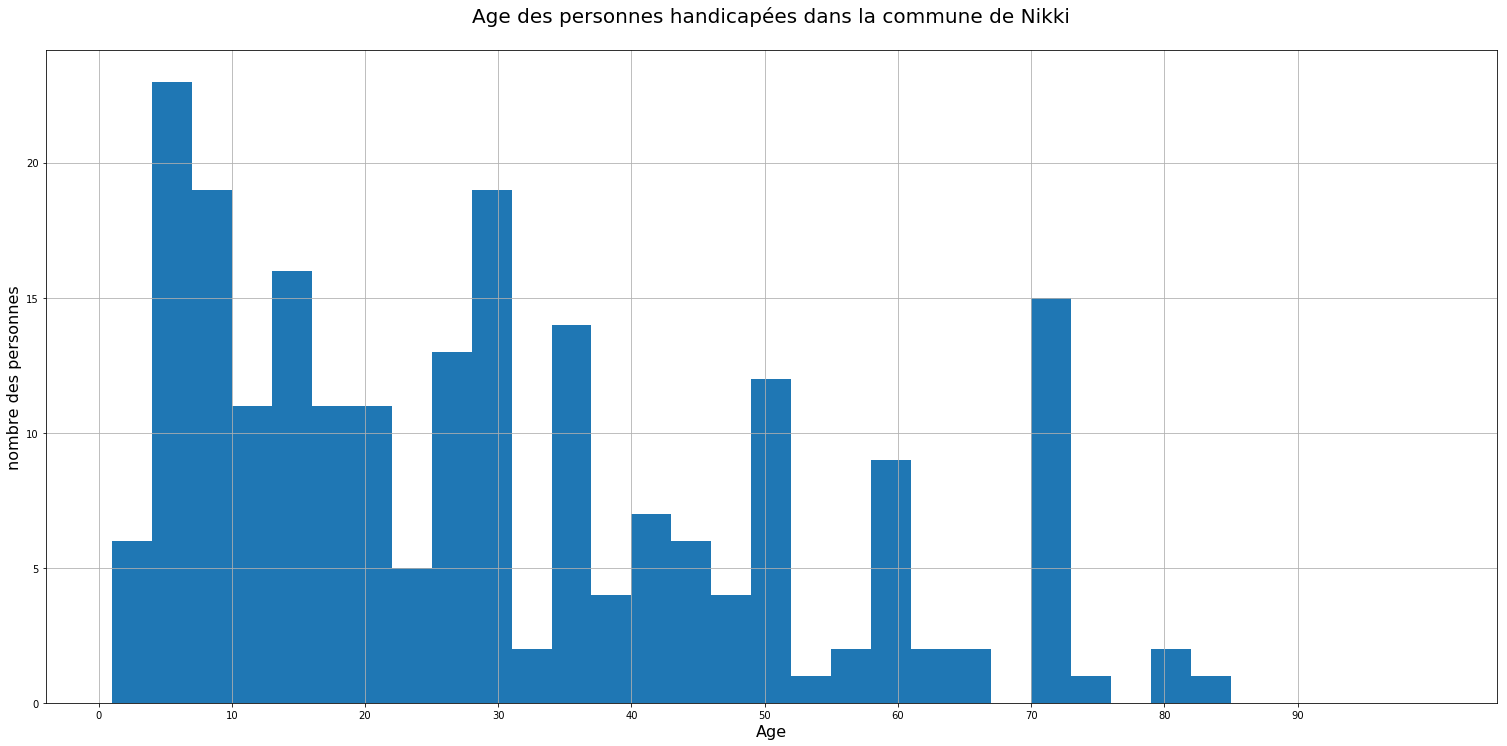

In [0]:
plt.rcParams['figure.figsize']=26,12
n=30
bins=np.arange(1,100+int(100/n),int(100/n))
df_per_han['Age'].hist(bins=bins)
plt.title('Age des personnes handicapées dans la commune de Nikki\n',fontsize=20)
plt.xlabel('Age',fontsize=16)
plt.ylabel('nombre des personnes',fontsize=16)

plt.xticks(np.arange(0,100,10))
plt.show()

### PAR TYPE DE HANDICAPÉE

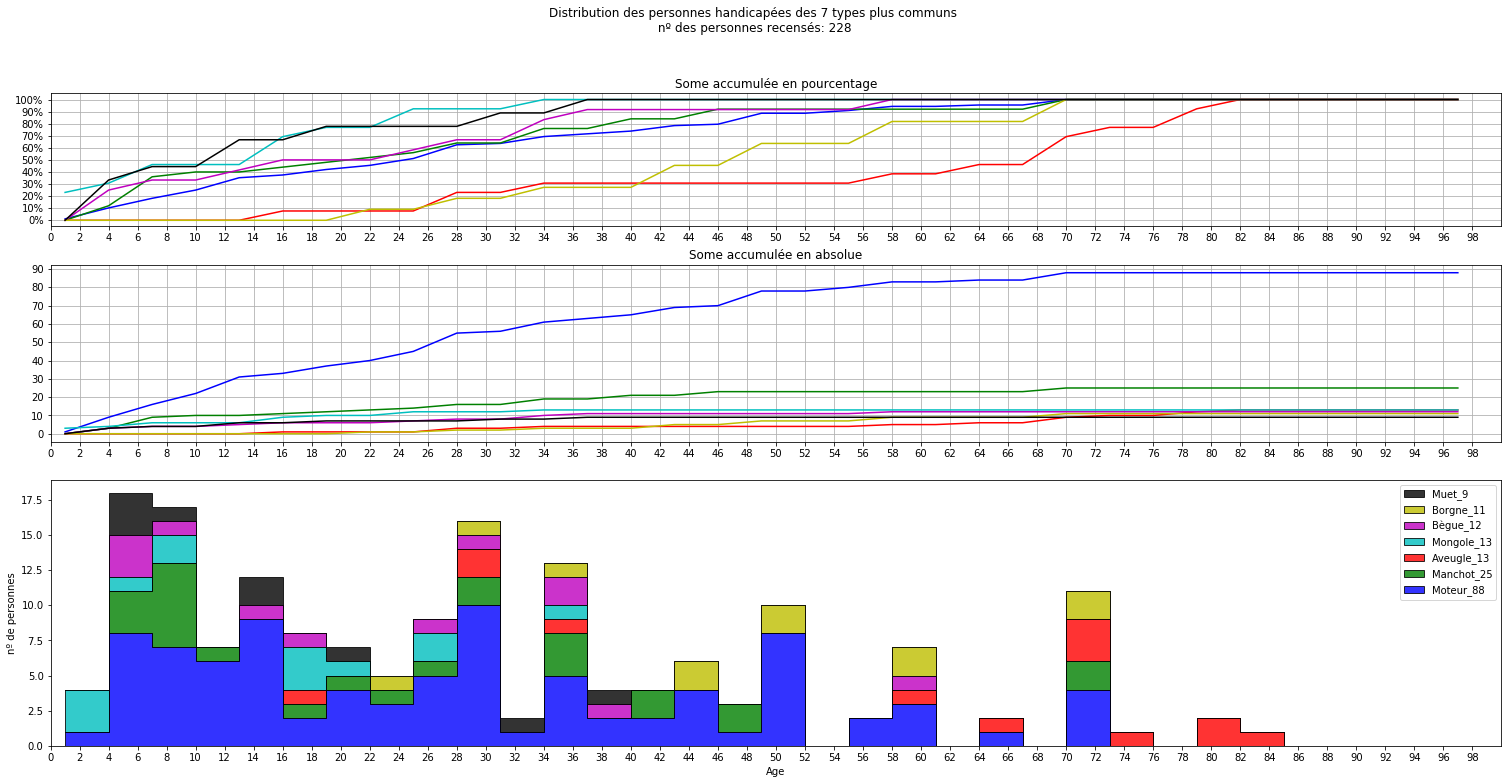

In [0]:
n=30
bins=np.arange(1,100+int(100/n),int(100/n))
x_type=7

plt.rcParams['figure.figsize']=26,12
f, (ax_plot,ax_plot2,ax_hist) = plt.subplots(3, gridspec_kw={'height_ratios': [3, 4, 6]})

subplots = [ax_plot,ax_plot2,ax_hist]
l_type = df_per_han.groupby('Type de Handicappées',axis=0)['Timestamp'].count().reset_index().sort_values(by='Timestamp',ascending=False)['Type de Handicappées'].tolist()[0:x_type]
#l_type.remove('')

l_colors=list(colors.keys())[0:len(l_type)]

kwargs = dict(histtype='stepfilled', alpha=0.8, bins=bins,edgecolor='black')

datas = []

labels= []

for i,typ in enumerate(l_type):

  data = df_per_han[df_per_han['Type de Handicappées']==typ]['Age'].dropna()
  datas.append(data)
  label=typ+'_'+str(len(data))
  labels.append(label)
  #If want to plot one histogram for each iteration, "discomment" the next line
  #ax_hist.hist(data, color=colors[l_colors[i]],label=label, **kwargs)


  values, base = np.histogram(data, bins=bins)
      #evaluate the cumulative
  cumulative = np.cumsum(values)

  cumulative2 = [val/max(cumulative) for val in cumulative]

  ax_plot.plot(base[:-1], cumulative2,color=colors[l_colors[i]],label=label)
  ax_plot2.plot(base[:-1], cumulative,color=colors[l_colors[i]],label=label)
  
ax_hist.hist(datas, stacked=True, color = l_colors, label=labels,**kwargs)

ax_plot.grid()
ax_plot2.grid()

vals = ax_plot.get_yticks()

ax_plot.set_yticks(np.arange(0,1.1,0.1))
ax_plot2.set_yticks(np.arange(0,100,10))

vals = ax_plot.get_yticks()

ax_plot.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

xticks=np.arange(0,100,2)
for subpl in subplots:
  subpl.set_xticks(xticks)
  subpl.set_xlim([0,100])

ax_plot.set_title('Some accumulée en pourcentage')
ax_plot2.set_title('Some accumulée en absolue')
f.suptitle('Distribution des personnes handicapées des '+str(x_type)+' types plus communs'+
           '\n nº des personnes recensés: '+str(len(df_per_han))
          )

ax_hist.set_xlabel('Age')
ax_hist.set_ylabel('nº de personnes')

#ax_plot.legend()
#ax_plot2.legend()


#sort both labels and handles by labels
#labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0],reverse=True))
handles, labels = ax_hist.get_legend_handles_labels()
                     
ax_hist.legend(handles, labels)

plt.show()

## ARRONDISEMENT DES PERSSONES HANDICAPÉEs

In [0]:
plt.rcParams['figure.figsize'] = 20,10
#x=list(df_2019['rqtListe_Pompe.Modele_Pompe'].dropna().unique())
#y=[df_2019[df_2019['rqtListe_Pompe.Modele_Pompe']==model]['rqtListe_Pompe.Modele_Pompe'].count() for model in x]
x=list(df_per_han['Arrondisement'].dropna().unique())
y=[df_per_han[df_per_han['Arrondisement']==arron] for arron in x]

plt.xticks(fontsize=14,rotation=90)
plt.bar(x,y)

## Acte de Naissance

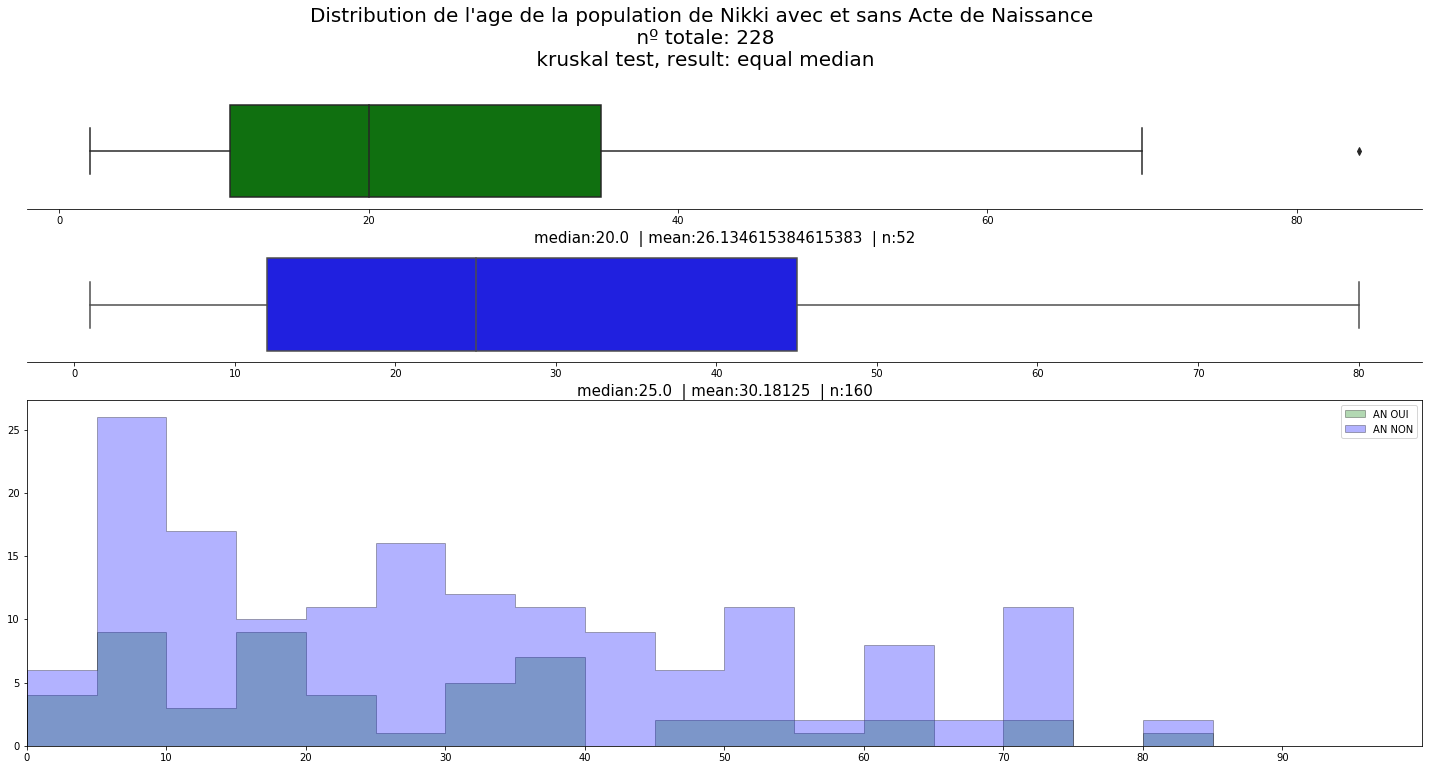

In [0]:
plt.rcParams['figure.figsize'] =25,12

f, (ax_box1,axbox2,ax_hist) = plt.subplots(3, gridspec_kw={'height_ratios': [2,2, 6]})

n=20
bins=np.arange(0,100+int(100/n),int(100/n))
subplots=[ax_box1,axbox2]

df_data = df_per_han#[df_per_han['Type de Handicappées']==l_type[0]]

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=bins,edgecolor='black')
for label,boolean,subplot,color in zip(['AN OUI','AN NON'],['OUI','NON'],subplots,['green','blue']):

  data=df_data[df_data['AN']==boolean]['Age'].dropna()

  ax_hist.hist(data,label=label,color=color,**kwargs)

  sns.boxplot(data, ax=subplot,color=color)
  sns.despine(ax=subplot, left=True)
  subplot.set(yticks=[])
  subplot.set_xlabel('median:'+str(data.quantile(0.5))+'  | '+
                       'mean:'+str(data.mean())+'  | '+
                       'n:'+str(len(data))+'\n\n',fontsize=15)

test = stats.kruskal(df_data[df_data['AN']=='OUI']['Age'].dropna(),
                     df_data[df_data['AN']=='NON']['Age'].dropna())
if test[1]>0.05:
  test='equal median'
else:
  test='not equal median'

f.suptitle("Distribution de l'age de la population de Nikki avec et sans Acte de Naissance"+
           '\n nº totale: '+str(len(df_data))+
          '\n kruskal test, result: '+str(test),
          fontsize=20)

ax_hist.set_xticks(np.arange(0,100,10))
ax_hist.set_xlim([0,100])
ax_hist.legend()


plt.show()